In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('crop_yield.csv')

In [5]:
# Replace 'Arhar/Tur' with 'Tur' in the Crop column
df["Crop"] = df["Crop"].replace("Arhar/Tur", "Tur")
df["Crop"] = df["Crop"].replace("Cotton(lint)", "Cotton")
df["Crop"] = df["Crop"].replace("Moong(Green Gram)", "Moong")
df["Crop"] = df["Crop"].replace("Peas & beans (Pulses)", "Peas & beans")
df["Crop"] = df["Crop"].replace("Cowpea(Lobia)", "Cowpea")


In [7]:
df = pd.DataFrame(df)

# Get unique crop names
unique_crops = df["Crop"].unique()

print(unique_crops)

['Arecanut' 'Tur' 'Castor seed' 'Coconut ' 'Cotton' 'Dry chillies' 'Gram'
 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed' 'Onion'
 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice' 'Sesamum'
 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco' 'Turmeric'
 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic' 'Ginger'
 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana' 'Soyabean'
 'Barley' 'Khesari' 'Masoor' 'Moong' 'Other Kharif pulses' 'Safflower'
 'Sannhamp' 'Sunflower' 'Urad' 'Peas & beans' 'other oilseeds'
 'Other Cereals' 'Cowpea' 'Oilseeds total' 'Guar seed'
 'Other Summer Pulses' 'Moth']


In [47]:
columns_to_drop = ['Crop_Year'	,'Season']  # Add any other column names you want to drop

# Drop the specified columns
df = df.drop(columns=columns_to_drop)
df.head(5)

,Crop,State,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,Assam,2051.4,7024878.38,22882.34,0.796087
1,Tur,Assam,2051.4,631643.29,2057.47,0.710435
2,Castor seed,Assam,2051.4,75755.32,246.76,0.238333
3,Coconut,Assam,2051.4,1870661.52,6093.36,5238.051739
4,Cotton,Assam,2051.4,165500.63,539.09,0.420909


In [49]:
# Define features (X) and target (y)
X = df.drop(columns=['Yield'])  # Drop target column
y = df['Yield']  

In [51]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_columns = ['Annual_Rainfall', 'Fertilizer', 'Pesticide']
categorical_columns = ['Crop','State']

# Create transformers
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_columns),  # Scale numerical columns
        ('cat', ohe, categorical_columns)   # One-hot encode categorical columns
    ]
)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3))
])

In [55]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Annual_Rainfall',
                                                   'Fertilizer', 'Pesticide']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Crop', 'State'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 26730.777260707833
R2 Score: 0.9666382335285187


In [67]:
def predict_yield(crop,state, annual_rainfall, fertilizer, pesticide):
    input_data = pd.DataFrame([[crop,state, annual_rainfall, fertilizer, pesticide]],
                              columns=['Crop','State', 'Annual_Rainfall', 'Fertilizer', 'Pesticide'])
    prediction = model_pipeline.predict(input_data)
    return prediction[0]

In [95]:
crop = 'cotton'
state = 'Kerala'
annual_rainfall = 2000
fertilizer = 70200
pesticide = 5000

predicted_yield = predict_yield(crop,state, annual_rainfall, fertilizer, pesticide)
print(f"Predicted Yield: {predicted_yield}")

Predicted Yield: 1.9803763041008229


C:\Users\Jayanth\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


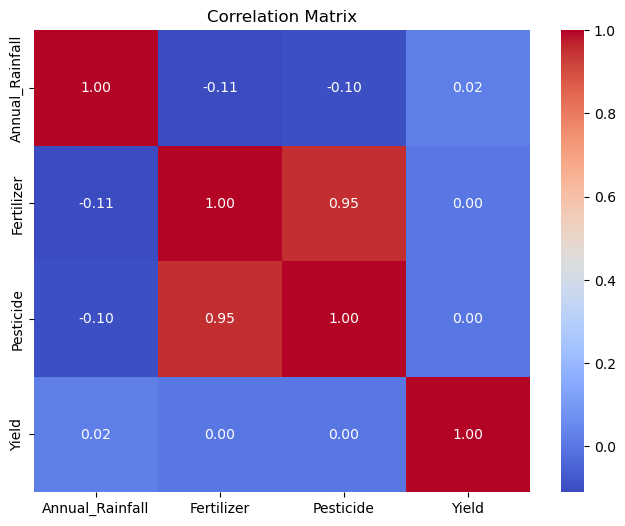

In [89]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=["number"])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [91]:
import joblib

# Save the model pipeline to a file
joblib.dump(model_pipeline, 'crop_yield_prediction1.pkl')
print("Model saved successfully!")

Model saved successfully!


In [93]:
df = pd.DataFrame(df)

# Get unique crop names
unique_crops = df["Crop"].unique()

print(unique_crops)

['Arecanut' 'Tur' 'Castor seed' 'Coconut ' 'Cotton' 'Dry chillies' 'Gram'
 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed' 'Onion'
 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice' 'Sesamum'
 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco' 'Turmeric'
 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic' 'Ginger'
 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana' 'Soyabean'
 'Barley' 'Khesari' 'Masoor' 'Moong' 'Other Kharif pulses' 'Safflower'
 'Sannhamp' 'Sunflower' 'Urad' 'Peas & beans' 'other oilseeds'
 'Other Cereals' 'Cowpea' 'Oilseeds total' 'Guar seed'
 'Other Summer Pulses' 'Moth']


In [99]:
import pandas as pd

# Load your dataset
data = df  # Replace with your actual dataset file

# Filter the data for Maharashtra
maharashtra_data = data[data['State'] == 'Maharashtra']

# Get unique crops in Maharashtra
unique_crops_maharashtra = maharashtra_data['Crop'].unique()

# Display the result
print("Unique Crops in Maharashtra:", unique_crops_maharashtra)


Unique Crops in Maharashtra: ['Tur' 'Bajra' 'Cotton' 'Gram' 'Jowar' 'Maize' 'Moong'
 'Other  Rabi pulses' 'Ragi' 'Rice' 'Sugarcane' 'Urad' 'Wheat'
 'Castor seed' 'Groundnut' 'Linseed' 'Niger seed' 'Other Cereals'
 'Other Kharif pulses' 'Rapeseed &Mustard' 'Safflower' 'Sesamum'
 'Soyabean' 'Sunflower' 'Small millets' 'Banana' 'Onion' 'other oilseeds'
 'Tobacco' 'Other Summer Pulses']
